In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings 
warnings.filterwarnings("ignore")

### Загрузим данные

In [3]:
train = np.loadtxt('../002/data/digit/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('../002/data/digit/test.csv', delimiter=',', skiprows=1)

In [4]:
y = train[:, 0]
X = train[:, 1:]

#### Визуализируем первое изображение

In [5]:
first = train[0, :]
first_img = np.resize(first, (28, 28))

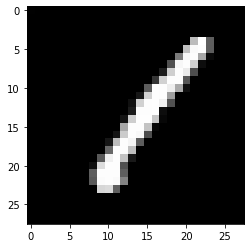

In [6]:
plt.imshow(first_img, cmap='gray')

### PCA разложение

#### Стандартизация

In [7]:
X = X - X.mean(axis=0) 

#### Матрица ковариаций

In [8]:
cov = np.dot(X.T, X)/X.shape[0]

#### SVD

In [9]:
U, S, V = np.linalg.svd(cov)

#### Найдем оптимальное кол-во признаков

In [10]:
cumsum = np.cumsum(S)/np.sum(S)

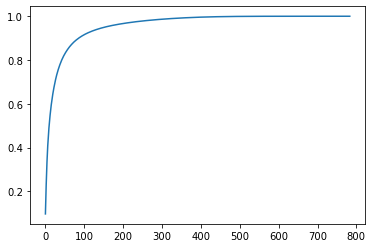

In [11]:
plt.plot(cumsum)

In [12]:
n_comp = np.argmax(np.where(cumsum > 0.95, 1, 0))
n_comp

153

#### Получаем данные с пониженной размерностью

In [13]:
X_redused = np.dot(X, U[:, :n_comp])

In [14]:
X_redused.shape

(42000, 153)

### Создаем модель классификации на данных с пониженной размерностью

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X_redused, y, test_size = 0.3, random_state=42)

In [17]:
params = {'C':[0.1,0.2,0.3,0.5],
          'penalty':['l1', 'l2', 'none']}

In [18]:
model = RandomizedSearchCV(LogisticRegression(), params, cv=5, scoring='accuracy')

In [19]:
model.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.1, 0.2, 0.3, 0.5],
                                        'penalty': ['l1', 'l2', 'none']},
                   scoring='accuracy')

In [20]:
best_model = model.best_estimator_

### Предсказываем тестовые данные

#### Приводим тестовые данные к нужному виду

In [24]:
test_standard = test - test.mean(axis=0)

In [25]:
test_redused = np.dot(test_standard, U[:, :n_comp])

#### Предсказываем

In [29]:
test_pred = best_model.predict(test_redused)

#### Визуализируем 

In [44]:
test_img = np.reshape(test, (len(test), 28, 28))

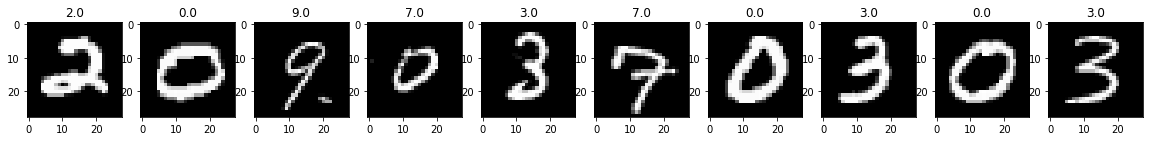

In [47]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:10], 1):
    subplot = fig.add_subplot(1, 10, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % test_pred[i - 1]);

### Сохраняем предсказанные данные

In [141]:
arr = []
for i in range(1, len(test_pred)+1):
    arr.append((i, int(test_pred[i-1])))

In [142]:
df = pd.DataFrame(arr, columns=['ImageId', 'Label'])

In [146]:
df.to_csv('data/predictions.csv', index=False)